In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import learning_curve

In [12]:
data = pd.read_csv("cleaned_data.csv")

In [13]:
# Map 'Yes' to 1 and 'No' to 0 in the 'Heart_Stroke' column
data['Heart_Stroke'] = data['Heart_Stroke'].map({'Yes': 1, 'No': 0})

# Label encoding for the 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Label encoding for binary categorical columns
label_encoder = LabelEncoder()
data['BPMeds'] = label_encoder.fit_transform(data['BPMeds'])
data['prevalentStroke'] = label_encoder.fit_transform(data['prevalentStroke'])
data['prevalentHyp'] = label_encoder.fit_transform(data['prevalentHyp'])

In [14]:
# One-hot encoding for the 'education' column
data = pd.get_dummies(data, columns=['education'], drop_first=True)

# Select features and target
X = data[['age', 'Gender', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'education_postgraduate', 'education_primaryschool', 'education_uneducated']]
y = data['Heart_Stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Build a simple neural network model using Keras
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert to binary predictions

Epoch 1/100
207/207 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.8402 - val_loss: 0.3718 - val_accuracy: 0.8597
Epoch 2/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8562 - val_loss: 0.3690 - val_accuracy: 0.8609
Epoch 3/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8556 - val_loss: 0.3676 - val_accuracy: 0.8622
Epoch 4/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8571 - val_loss: 0.3702 - val_accuracy: 0.8609
Epoch 5/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8568 - val_loss: 0.3741 - val_accuracy: 0.8609
Epoch 6/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8596 - val_loss: 0.3698 - val_accuracy: 0.8609
Epoch 7/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8629 - val_loss: 0.3669 - val_accuracy: 0.8549

Epoch 58/100
207/207 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9228 - val_loss: 0.5415 - val_accuracy: 0.8126
Epoch 59/100
207/207 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9255 - val_loss: 0.5584 - val_accuracy: 0.8295
Epoch 60/100
207/207 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9234 - val_loss: 0.5469 - val_accuracy: 0.8210
Epoch 61/100
207/207 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9237 - val_loss: 0.5595 - val_accuracy: 0.8222
Epoch 62/100
207/207 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9280 - val_loss: 0.5536 - val_accuracy: 0.8138
Epoch 63/100
207/207 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9289 - val_loss: 0.5646 - val_accuracy: 0.8331
Epoch 64/100
207/207 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9271 - val_loss: 0.5874 - val_accuracy:

Confusion Matrix:
[[659  52]
 [103  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       711
           1       0.20      0.11      0.14       116

    accuracy                           0.81       827
   macro avg       0.53      0.52      0.52       827
weighted avg       0.77      0.81      0.79       827



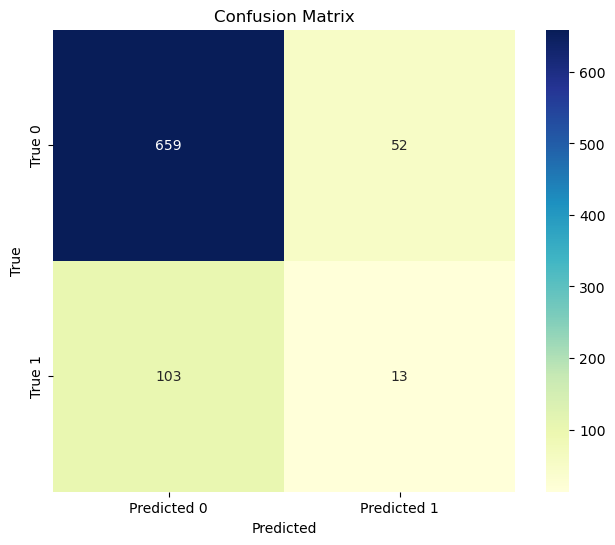

In [16]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Create a heatmap of the confusion matrix with a different color combination and color bar
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=True, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

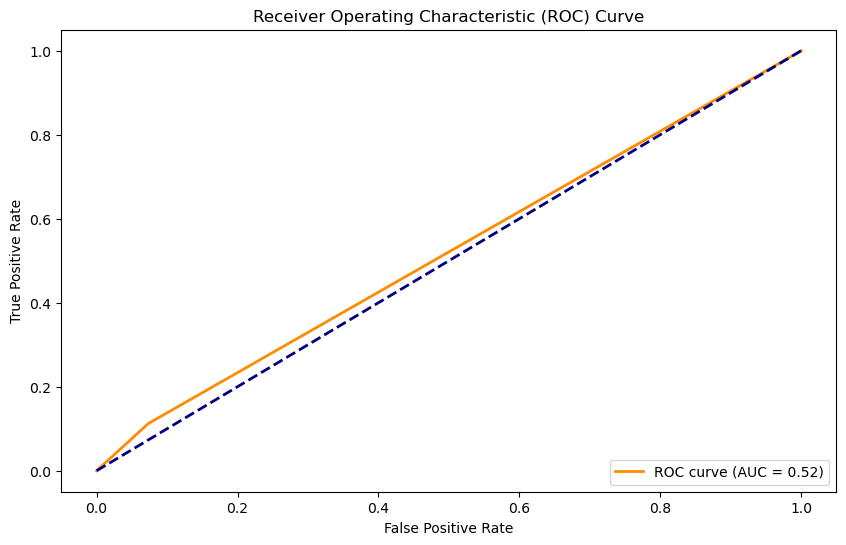

In [17]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

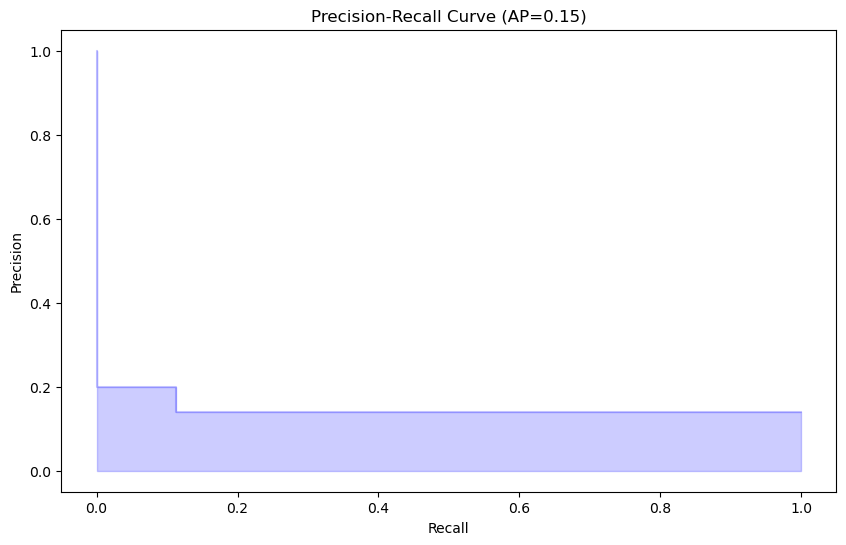

In [18]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP={0:.2f})'.format(average_precision))
plt.show()

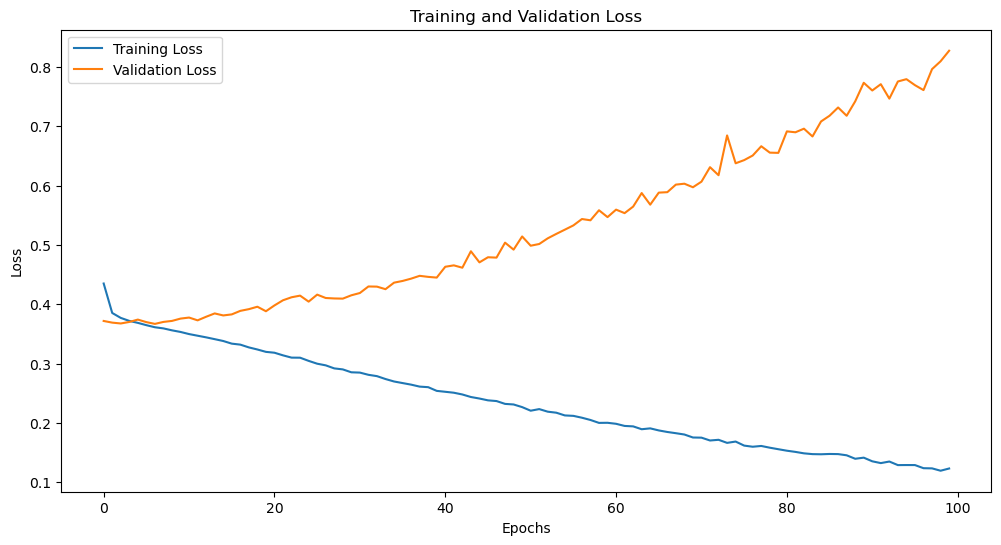

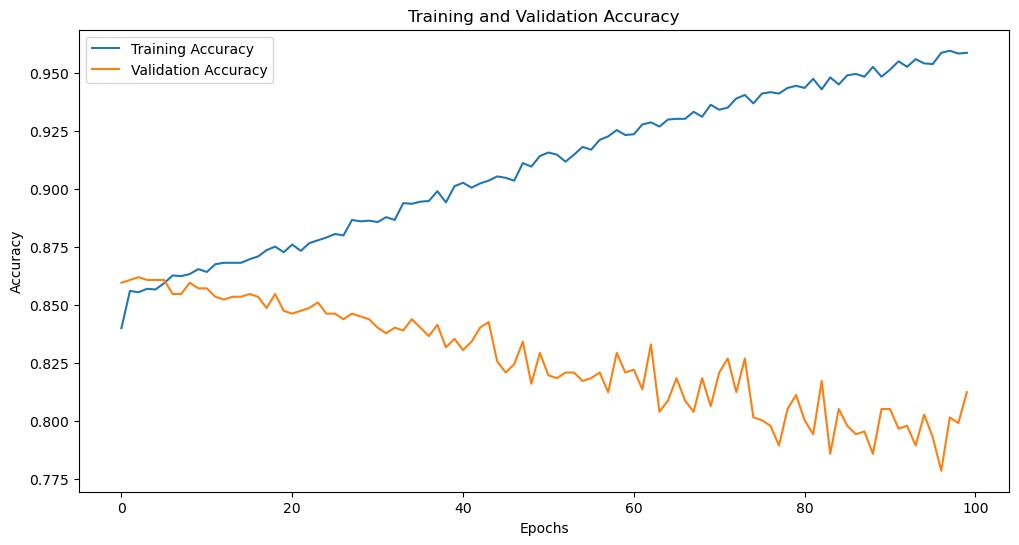

In [19]:
# Train the model on the training data
#history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()